# VGG-16 Model 1b
## Preprocessing method: image_dataset_from_directory()
## Image size: (224, 224) 
## Images: Grayscale
## Unfrozen pretrained layers
## No image transformation

In [1]:
import pandas as pd
import numpy as np
import io
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
path_training = 'gender_images/Training/'
path_validation = 'gender_images/Validation/'

In [3]:
image_size = (224, 224)
batch_size = 64
train_ds = tf.keras.preprocessing.image_dataset_from_directory(path_training,
                                                               color_mode = "grayscale",
                                                               seed=1993,
                                                               image_size = image_size)

val_ds =  tf.keras.preprocessing.image_dataset_from_directory(path_validation,
                                                              seed=1993,
                                                              color_mode = "grayscale",
                                                              image_size = image_size)

Found 47009 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


In [4]:
vgg_model = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg_model.trainable = True

# Model layers
input_tensor = tf.keras.layers.Input(shape=(224, 224, 1))
x = keras.layers.Conv2D(3,(3,3),padding='same')(input_tensor)
x = vgg_model(x)
out = keras.layers.Dense(1, activation='sigmoid')(x)

# Set early stopping after certain number of epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
epochs=1000     # Set epochs

# Generate model
model = keras.Model(inputs = input_tensor, outputs = out)
model.compile(optimizer=keras.optimizers.Adam(1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 3)       30        
                                                                 
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense (Dense)               (None, 1)                 1001      
                                                                 
Total params: 138,358,575
Trainable params: 138,358,575
Non-trainable params: 0
_________________________________________________________________


In [5]:
vgg16_fit = model.fit(train_ds, 
                      epochs=epochs, 
                      validation_data=val_ds,
                      callbacks=[callback])

Epoch 1/1000
1470/1470 [==============================] - 268s 157ms/step - loss: 0.6936 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.4986
Epoch 2/1000
1470/1470 [==============================] - 232s 158ms/step - loss: 0.6936 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 3/1000
1470/1470 [==============================] - 230s 157ms/step - loss: 0.6936 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4986
Epoch 4/1000
1470/1470 [==============================] - 226s 154ms/step - loss: 0.6936 - accuracy: 0.4986 - val_loss: 0.6933 - val_accuracy: 0.4986
Epoch 5/1000
1470/1470 [==============================] - 226s 154ms/step - loss: 0.6937 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.4986


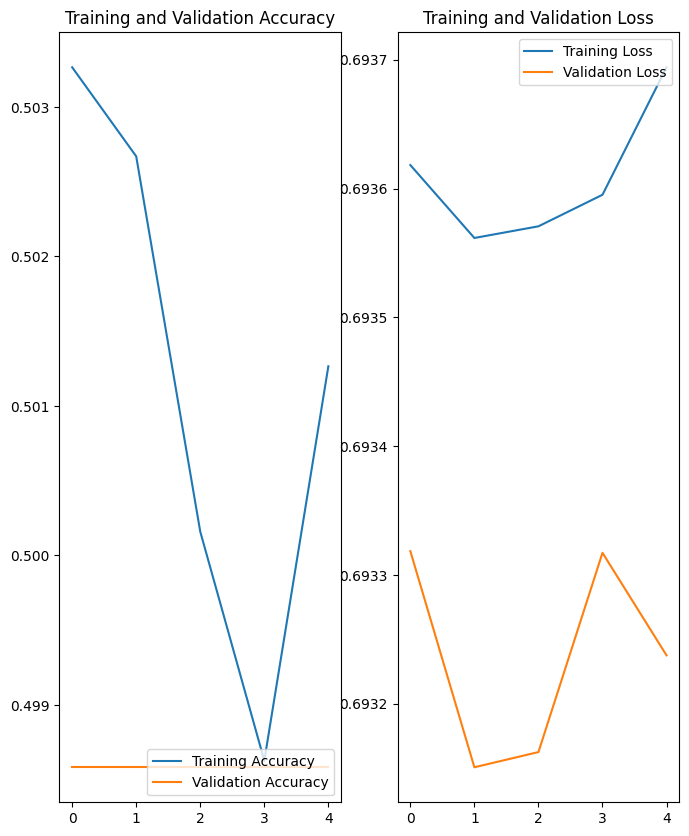

In [6]:
acc= vgg16_fit.history['accuracy']
val_acc = vgg16_fit.history['val_accuracy']

loss = vgg16_fit.history['loss']
val_loss = vgg16_fit.history['val_loss']

epochs_range = range(0, 5)

plt.figure(figsize=(8, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [7]:
print(str('Top Training Accuracy: ') + str(round(max(acc),4)))
print(str('Top Validation Accuracy: ') + str(round(max(val_acc),4)))

Top Training Accuracy: 0.5033
Top Validation Accuracy: 0.4986


In [8]:
model.save("GC weights/Unfrozen/mod1b-gs/mod1b_gs_unfrozen.h5")